# Exploratory Data Analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from pathlib import Path
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [50]:
%run ../custom/jc-functions.ipynb

In [51]:
# Import training dataset
dataset = Path('../dataset')
df = pd.read_csv(dataset/"accidents_train.csv")
df.head()

,Num,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,3,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,5,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [52]:
df.columns

Index(['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [53]:
df.shape

(8210, 33)

Original dataset has 8210 rows  and 33 features. 
The target feature is "Accident_severity". 

In [54]:
target = 'Accident_severity'
my_list = df.columns.tolist()
set3 = my_list[21:33]
print(len(set3), set3)


12 ['Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


## Dataset split into 3 sets of features for EDA by team

### Dataset 1

In [55]:
selected_columns = ['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Accident_severity']
df_matt = df[selected_columns]
print(df_matt.dtypes)

Num                         int64
Time                       object
Day_of_week                object
Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Type_of_vehicle            object
Owner_of_vehicle           object
Service_year_of_vehicle    object
Accident_severity          object
dtype: object


In [56]:
print(df_matt.describe)

<bound method NDFrame.describe of        Num      Time Day_of_week Age_band_of_driver Sex_of_driver  \
0        1  17:02:00      Monday              18-30          Male   
1        2  17:02:00      Monday              31-50          Male   
2        3  17:02:00      Monday              18-30          Male   
3        4   1:06:00      Sunday              18-30          Male   
4        5   1:06:00      Sunday              18-30          Male   
...    ...       ...         ...                ...           ...   
8205  8206  17:40:00      Monday              18-30          Male   
8206  8207  17:45:00     Tuesday            Over 51          Male   
8207  8208  17:45:00     Tuesday              18-30          Male   
8208  8209   8:25:00    Thursday              18-30          Male   
8209  8210   8:25:00    Thursday              31-50          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
0      Above high school                Employee              1-2y

In [57]:
print(df_matt.shape)

(8210, 12)


In [58]:
print(df_matt.isnull().sum())

Num                           0
Time                          0
Day_of_week                   0
Age_band_of_driver            0
Sex_of_driver                 0
Educational_level           476
Vehicle_driver_relation     340
Driving_experience          545
Type_of_vehicle             652
Owner_of_vehicle            321
Service_year_of_vehicle    2705
Accident_severity             0
dtype: int64


In [59]:
df_matt_cleaned = df_matt.copy()

In [60]:
# Replace the null values with the mode of each column
for column in df_matt_cleaned.columns:
    if df_matt_cleaned[column].dtype == 'object' or df_matt_cleaned[column].dtype == 'category':
        mode_value = df_matt_cleaned[column].mode()[0]
        df_matt_cleaned[column].fillna(mode_value, inplace=True)

C:\Users\manuel.clemente\AppData\Local\Temp\ipykernel_31808\1655853051.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matt_cleaned[column].fillna(mode_value, inplace=True)


In [61]:
print(df_matt_cleaned.isnull().sum())

Num                        0
Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Type_of_vehicle            0
Owner_of_vehicle           0
Service_year_of_vehicle    0
Accident_severity          0
dtype: int64


In [62]:
print(df_matt_cleaned.head())

   Num      Time Day_of_week Age_band_of_driver Sex_of_driver  \
0    1  17:02:00      Monday              18-30          Male   
1    2  17:02:00      Monday              31-50          Male   
2    3  17:02:00      Monday              18-30          Male   
3    4   1:06:00      Sunday              18-30          Male   
4    5   1:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   

In [63]:
for column in df_matt_cleaned.columns:
    if df_matt_cleaned[column].dtype == 'object':
        print(f"\nFrequency distribution for {column}:\n", df_matt_cleaned[column].value_counts())


Frequency distribution for Time:
 Time
16:00:00    76
18:00:00    76
17:00:00    73
18:30:00    69
17:30:00    66
            ..
0:43:00      1
15:22:00     1
19:24:00     1
22:54:00     1
14:54:00     1
Name: count, Length: 1027, dtype: int64

Frequency distribution for Day_of_week:
 Day_of_week
Friday       1326
Thursday     1288
Wednesday    1250
Tuesday      1169
Monday       1139
Saturday     1127
Sunday        911
Name: count, dtype: int64

Frequency distribution for Age_band_of_driver:
 Age_band_of_driver
18-30       2728
31-50       2688
Unknown     1323
Over 51      933
Under 18     538
Name: count, dtype: int64

Frequency distribution for Sex_of_driver:
 Sex_of_driver
Male       7582
Female      462
Unknown     166
Name: count, dtype: int64

Frequency distribution for Educational_level:
 Educational_level
Junior high school    5540
Elementary school     1457
High school            754
Above high school      224
Writing & reading      138
Unknown                 65
Illiterate

In [64]:
print("\nMode for num is ", df_matt_cleaned['Num'].mode()[0])
print("Median for num is ", df_matt_cleaned['Num'].median())

pq3,pq1 = np.percentile(df_matt_cleaned['Num'], [75,25])

iqr = pq3-pq1
print("IQR for Num is ", iqr)


Mode for num is  1
Median for num is  4105.5
IQR for Num is  4104.5


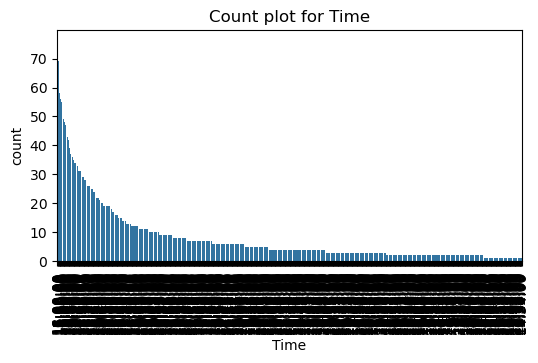

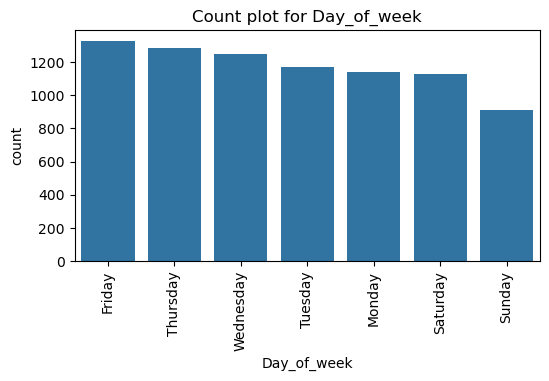

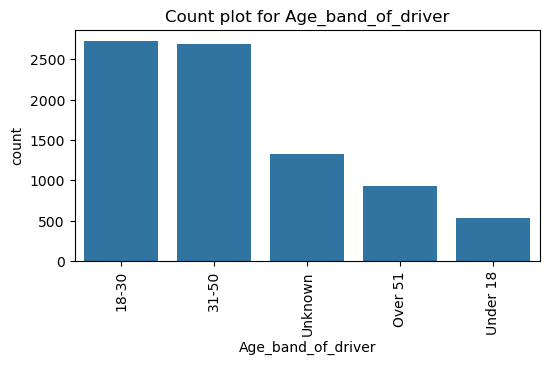

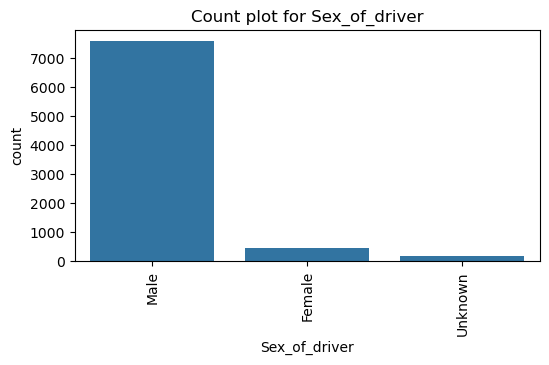

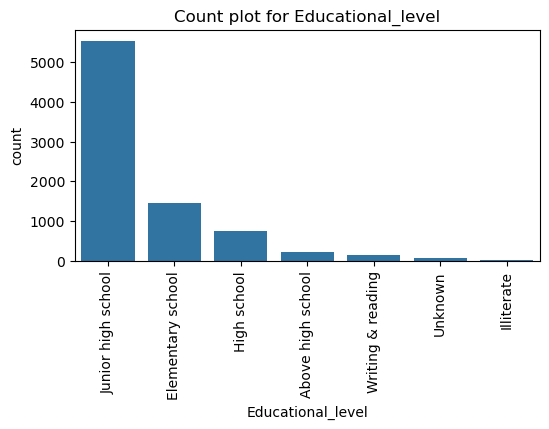

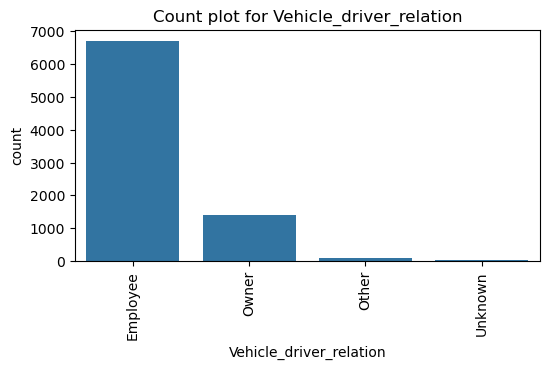

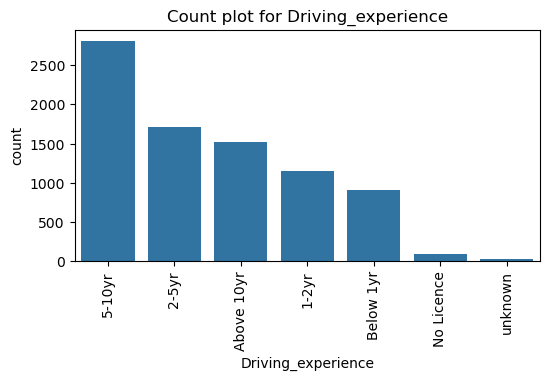

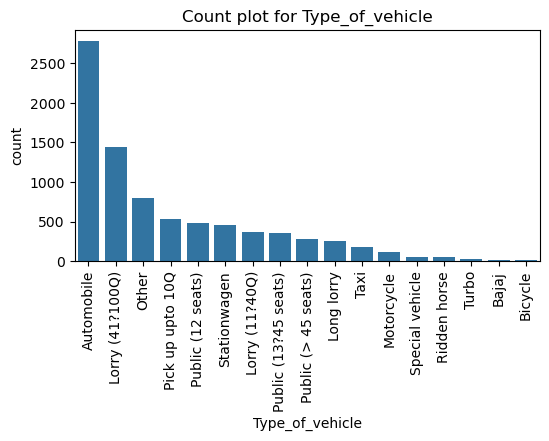

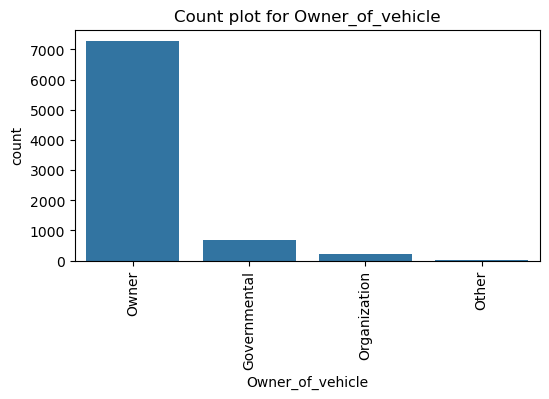

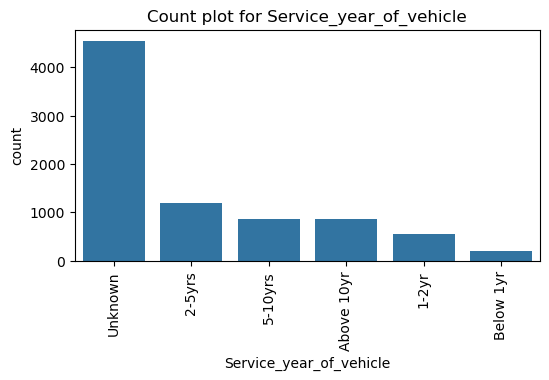

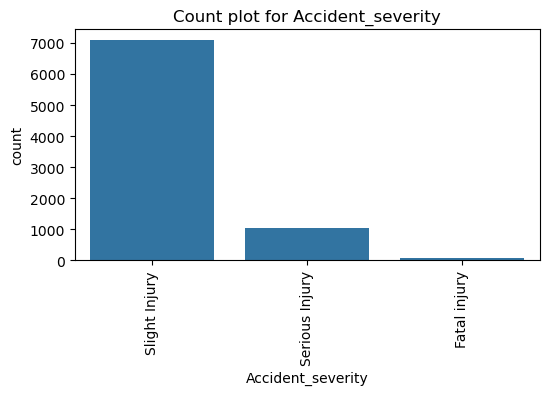

In [65]:
for column in df_matt_cleaned.columns:
    if df_matt_cleaned[column].dtype == 'object':
        plt.figure(figsize=(6, 3))
        sns.countplot(data=df_matt_cleaned, x=column, order=df_matt_cleaned[column].value_counts().index)
        plt.xticks(rotation=90)
        plt.title(f"Count plot for {column}")
        plt.show()

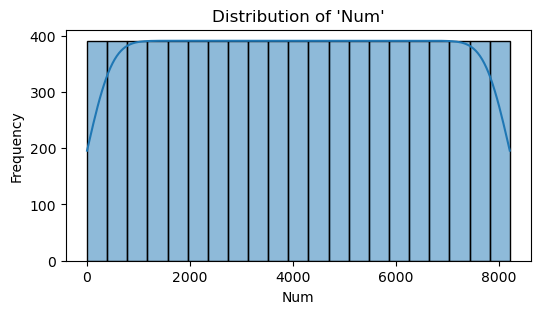

In [97]:
if 'Num' in df_matt_cleaned.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_matt_cleaned['Num'], kde=True)
    plt.title("Distribution of 'Num'")
    plt.xlabel("Num")
    plt.ylabel("Frequency")
    plt.show()

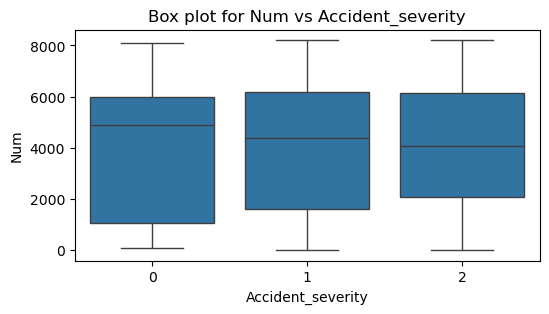


Summary statistics for Num by Accident_severity:
                    count         mean          std   min      25%     50%  \
Accident_severity                                                            
0                    82.0  4207.951220  2495.144756  90.0  1063.25  4885.5   
1                  1046.0  4085.738050  2471.899158   3.0  1610.25  4376.0   
2                  7082.0  4107.232561  2353.602660   1.0  2094.25  4061.5   

                       75%     max  
Accident_severity                   
0                  5968.75  8114.0  
1                  6176.75  8197.0  
2                  6154.75  8210.0   



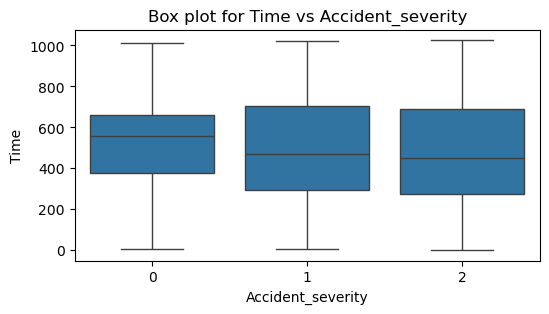


Summary statistics for Time by Accident_severity:
                    count       mean         std  min    25%    50%     75%  \
Accident_severity                                                             
0                    82.0  517.52439  253.585071  6.0  379.0  555.0  662.25   
1                  1046.0  498.91587  277.420867  6.0  293.0  471.5  706.00   
2                  7082.0  487.55281  281.652599  0.0  273.0  452.0  691.00   

                      max  
Accident_severity          
0                  1010.0  
1                  1023.0  
2                  1026.0   



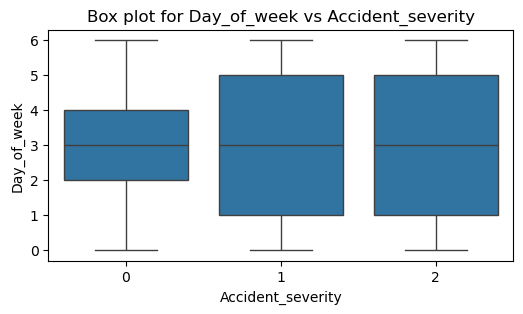


Summary statistics for Day_of_week by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  3.158537  1.613749  0.0  2.0  3.0  4.0  6.0
1                  1046.0  3.051625  2.048038  0.0  1.0  3.0  5.0  6.0
2                  7082.0  2.989551  2.066239  0.0  1.0  3.0  5.0  6.0 



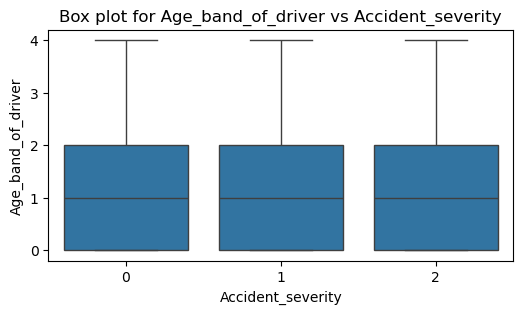


Summary statistics for Age_band_of_driver by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  1.073171  1.194437  0.0  0.0  1.0  2.0  4.0
1                  1046.0  1.317400  1.340079  0.0  0.0  1.0  2.0  4.0
2                  7082.0  1.411183  1.427267  0.0  0.0  1.0  2.0  4.0 



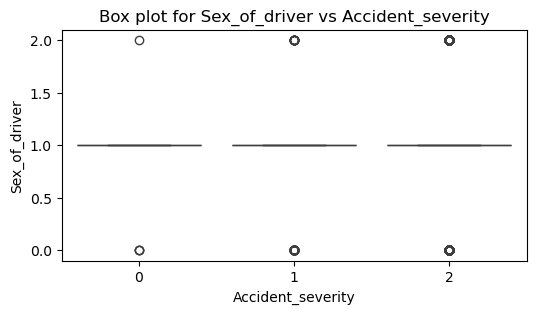


Summary statistics for Sex_of_driver by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  0.975610  0.220863  0.0  1.0  1.0  1.0  2.0
1                  1046.0  0.961759  0.263343  0.0  1.0  1.0  1.0  2.0
2                  7082.0  0.964134  0.276380  0.0  1.0  1.0  1.0  2.0 



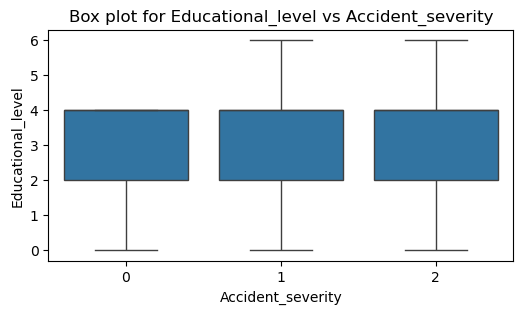


Summary statistics for Educational_level by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  3.146341  1.388862  0.0  2.0  4.0  4.0  4.0
1                  1046.0  3.192161  1.398008  0.0  2.0  4.0  4.0  6.0
2                  7082.0  3.216182  1.358598  0.0  2.0  4.0  4.0  6.0 



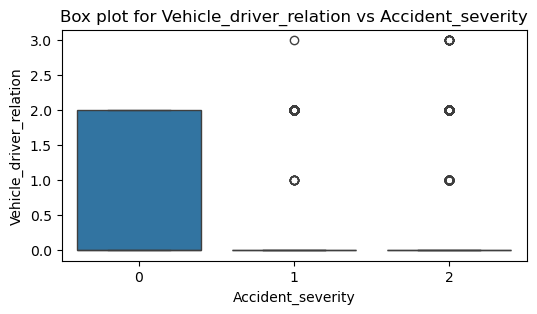


Summary statistics for Vehicle_driver_relation by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  0.560976  0.904004  0.0  0.0  0.0  2.0  2.0
1                  1046.0  0.378585  0.781411  0.0  0.0  0.0  0.0  3.0
2                  7082.0  0.351031  0.757706  0.0  0.0  0.0  0.0  3.0 



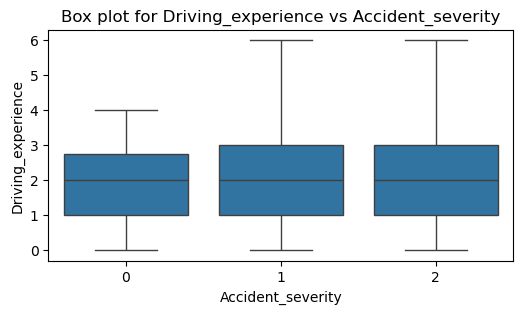


Summary statistics for Driving_experience by Accident_severity:
                    count      mean       std  min  25%  50%   75%  max
Accident_severity                                                      
0                    82.0  1.719512  1.091769  0.0  1.0  2.0  2.75  4.0
1                  1046.0  2.023901  1.245241  0.0  1.0  2.0  3.00  6.0
2                  7082.0  1.953968  1.237107  0.0  1.0  2.0  3.00  6.0 



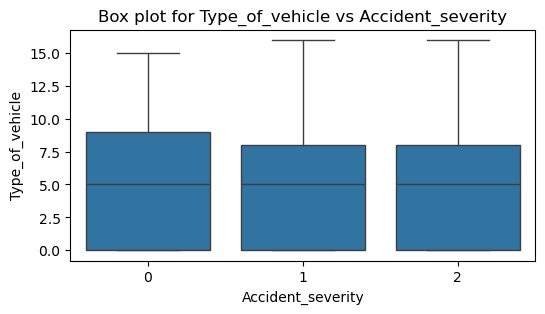


Summary statistics for Type_of_vehicle by Accident_severity:
                    count      mean       std  min  25%  50%  75%   max
Accident_severity                                                      
0                    82.0  5.439024  4.871427  0.0  0.0  5.0  9.0  15.0
1                  1046.0  5.116635  4.543650  0.0  0.0  5.0  8.0  16.0
2                  7082.0  5.089523  4.557549  0.0  0.0  5.0  8.0  16.0 



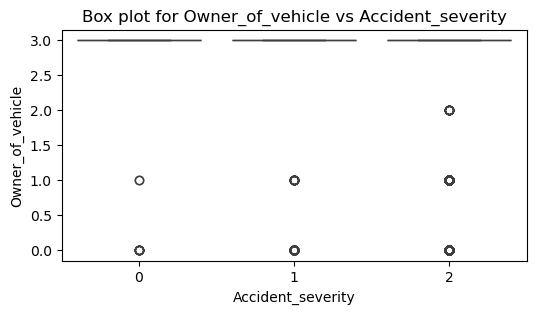


Summary statistics for Owner_of_vehicle by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  2.621951  0.976770  0.0  3.0  3.0  3.0  3.0
1                  1046.0  2.724665  0.843043  0.0  3.0  3.0  3.0  3.0
2                  7082.0  2.689636  0.882747  0.0  3.0  3.0  3.0  3.0 



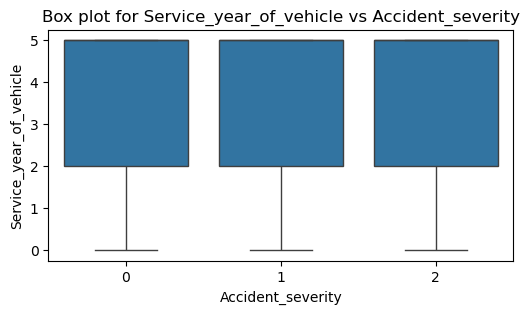


Summary statistics for Service_year_of_vehicle by Accident_severity:
                    count      mean       std  min  25%  50%  75%  max
Accident_severity                                                     
0                    82.0  3.719512  1.723293  0.0  2.0  5.0  5.0  5.0
1                  1046.0  3.537285  1.805904  0.0  2.0  5.0  5.0  5.0
2                  7082.0  3.529229  1.801569  0.0  2.0  5.0  5.0  5.0 



In [99]:
for column in df_matt_cleaned.columns:
    if column != 'Accident_severity':
        if df_matt_cleaned[column].dtype == 'object':
            plt.figure(figsize=(6, 3))
            sns.countplot(data=df_matt_cleaned, x=column, hue='Accident_severity', order=df_matt_cleaned[column].value_counts().index)
            plt.xticks(rotation=90)
            plt.title(f"Count plot for {column} vs Accident_severity")
            plt.show()


            cross_tab = pd.crosstab(df_matt_cleaned[column], df_matt_cleaned['Accident_severity'])
            chi2_stat, p_val, dof, ex = chi2_contingency(cross_tab)
            print(f"\nChi-Square Test results for {column} vs Accident_severity:")
            print(f"Chi2 Stat: {chi2_stat}, p-value: {p_val}\n")

        elif pd.api.types.is_numeric_dtype(df_matt_cleaned[column]):
            plt.figure(figsize=(6, 3))
            sns.boxplot(data=df_matt_cleaned, x='Accident_severity', y=column)
            plt.title(f"Box plot for {column} vs Accident_severity")
            plt.show()


            print(f"\nSummary statistics for {column} by Accident_severity:")
            print(df_matt_cleaned.groupby('Accident_severity')[column].describe(), "\n")

                    Feature  Chi-Square Score       P-Value
1                      Time        375.352440  3.113532e-82
0                       Num        314.322372  5.568833e-69
3        Age_band_of_driver         11.921414  2.578089e-03
6   Vehicle_driver_relation         11.637317  2.971588e-03
7        Driving_experience          4.727723  9.405632e-02
8           Type_of_vehicle          2.038530  3.608601e-01
2               Day_of_week          1.872532  3.920893e-01
10  Service_year_of_vehicle          0.839878  6.570869e-01
9          Owner_of_vehicle          0.572299  7.511504e-01
5         Educational_level          0.276298  8.709687e-01
4             Sex_of_driver          0.017023  9.915244e-01


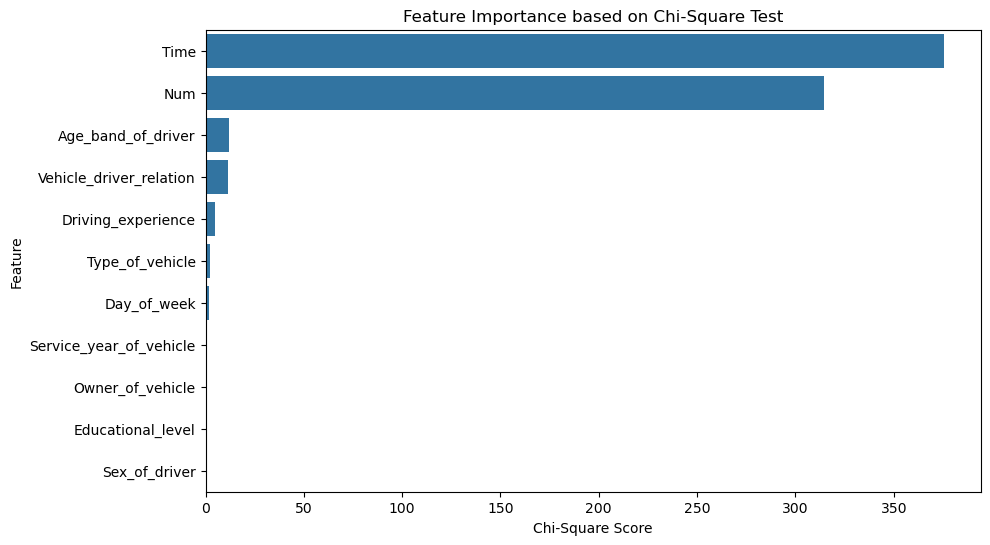

In [68]:
label_encoder = LabelEncoder()


categorical_columns = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
                       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
                       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle']

for col in categorical_columns:
    df_matt_cleaned[col] = label_encoder.fit_transform(df_matt_cleaned[col])


df_matt_cleaned['Accident_severity'] = label_encoder.fit_transform(df_matt_cleaned['Accident_severity'])


X = df_matt_cleaned.drop(columns=['Accident_severity'])
y = df_matt_cleaned['Accident_severity']


best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)


feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': fit.scores_, 'P-Value': fit.pvalues_})


print(feature_scores.sort_values(by='Chi-Square Score', ascending=False))


plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Square Score', y='Feature', data=feature_scores.sort_values(by='Chi-Square Score', ascending=False))
plt.title('Feature Importance based on Chi-Square Test')
plt.show()

### Dataset 2

In [69]:
target = 'Accident_severity'
my_list = df.columns.tolist()
set2 = my_list[11:21]
set2.append(target)
print(len(set2),set2)
df1 = df[set2]
df1.head()

11 ['Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Accident_severity']


,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Accident_severity
0,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Slight Injury
1,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Slight Injury
2,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Serious Injury
3,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Slight Injury
4,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Slight Injury


In [70]:
#Initial Inspection
print(df1.isnull().sum())

print(df1.info())

print(df1.describe(include='object'))

Defect_of_vehicle          2985
Area_accident_occured       160
Lanes_or_Medians            267
Road_allignment             102
Types_of_Junction             0
Road_surface_type           115
Road_surface_conditions       0
Light_conditions              0
Weather_conditions            0
Type_of_collision           100
Accident_severity             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Defect_of_vehicle        5225 non-null   object
 1   Area_accident_occured    8050 non-null   object
 2   Lanes_or_Medians         7943 non-null   object
 3   Road_allignment          8108 non-null   object
 4   Types_of_Junction        8210 non-null   object
 5   Road_surface_type        8095 non-null   object
 6   Road_surface_conditions  8210 non-null   object
 7   Light_conditions         8210 non-null   objec

In [71]:
#Define categorical features
categorical_features = ['Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision']

In [72]:
#Data quality report
data_quality_report_cat(df1, categorical_features)

Data Quality Report for Categorical Features
Stats
-----
                   Feature  Count  Missing  % Missing  Cardinality
0        Defect_of_vehicle   5225     2985      57.13            4
1    Area_accident_occured   8050      160       1.99           15
2         Lanes_or_Medians   7943      267       3.36            8
3          Road_allignment   8108      102       1.26           10
4        Types_of_Junction   8210        0       0.00            8
5        Road_surface_type   8095      115       1.42            6
6  Road_surface_conditions   8210        0       0.00            4
7         Light_conditions   8210        0       0.00            4
8       Weather_conditions   8210        0       0.00            9
9        Type_of_collision   8110      100       1.23           11


Mode 1
------
                   Feature                                            Mode 1  \
0        Defect_of_vehicle                                         No defect   
1    Area_accident_occured    

#### Cleaning the data

In [73]:
#Data cleaning
for col in df1.columns:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

C:\Users\manuel.clemente\AppData\Local\Temp\ipykernel_31808\4285372874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].fillna(df1[col].mode()[0])


In [74]:
#Double-check clean data
data_quality_report_cat(df1, categorical_features)

Data Quality Report for Categorical Features
Stats
-----
                   Feature  Count  Missing  % Missing  Cardinality
0        Defect_of_vehicle   8210        0        0.0            3
1    Area_accident_occured   8210        0        0.0           14
2         Lanes_or_Medians   8210        0        0.0            7
3          Road_allignment   8210        0        0.0            9
4        Types_of_Junction   8210        0        0.0            8
5        Road_surface_type   8210        0        0.0            5
6  Road_surface_conditions   8210        0        0.0            4
7         Light_conditions   8210        0        0.0            4
8       Weather_conditions   8210        0        0.0            9
9        Type_of_collision   8210        0        0.0           10


Mode 1
------
                   Feature                                            Mode 1  \
0        Defect_of_vehicle                                         No defect   
1    Area_accident_occured    

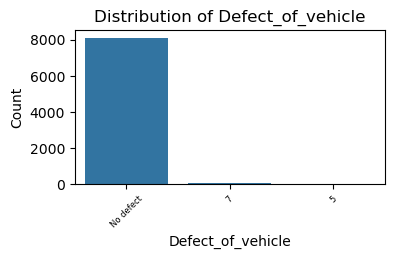

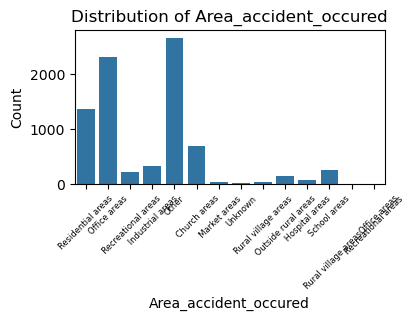

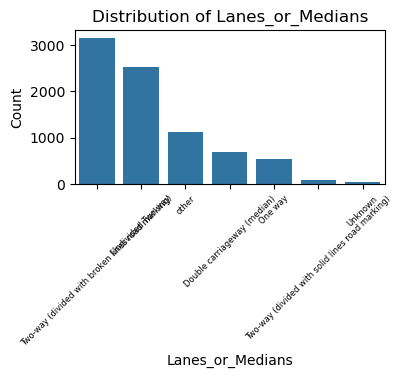

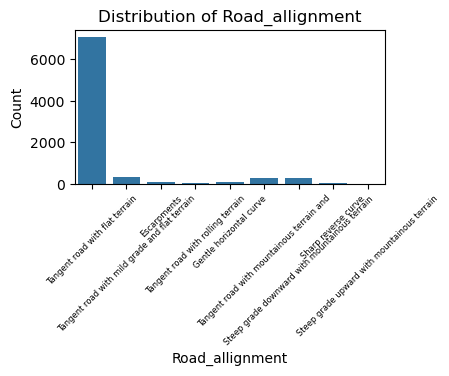

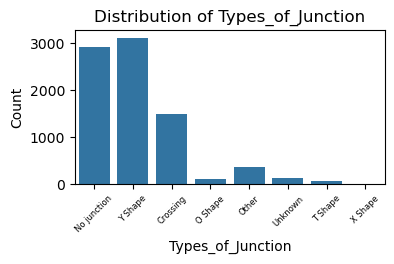

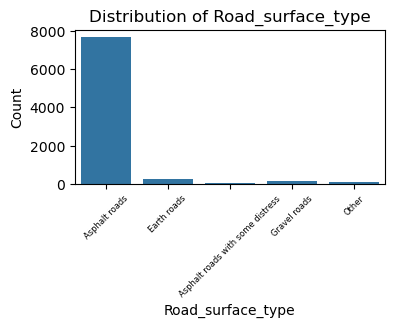

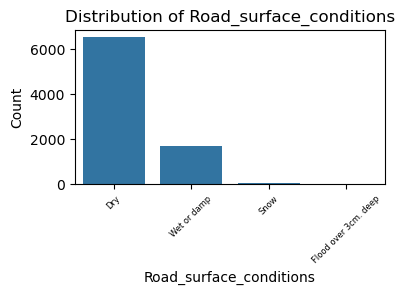

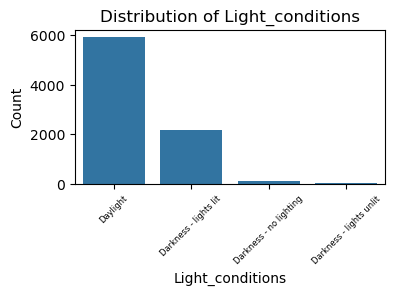

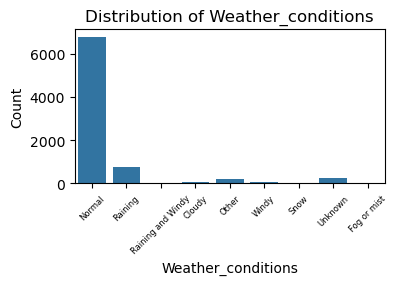

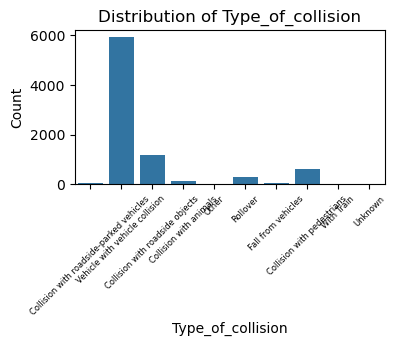

In [75]:
#Visualize distributions
for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df1, x=feature)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.xticks(rotation=45, fontsize=6)
    plt.ylabel('Count')
    plt.show()

In [76]:
#Define function to perform chi-square test
def perform_chi2_test(df, feature1, target):
    contingency_table = pd.crosstab(df[feature1], df[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value

In [77]:
chi_square_results = []
chi_square_values = []
p_values = []

#Perform chi-squared test
for column in categorical_features:
    chi2, p_value = perform_chi2_test(df, column, 'Accident_severity')
    chi_square_results.append((column, chi2, p_value))
    chi_square_values.append(chi2)
    p_values.append(p_value)
    print(f"Chi-squared test for {column}:")
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof:.02f}\n")

Chi-squared test for Defect_of_vehicle:
Chi-squared value: 1.815558107965728
P-value: 0.7696347037158582
Degrees of Freedom: 10.00

Chi-squared test for Area_accident_occured:
Chi-squared value: 45.60537733466555
P-value: 0.010093215397474282
Degrees of Freedom: 10.00

Chi-squared test for Lanes_or_Medians:
Chi-squared value: 10.46542304855572
P-value: 0.5751993036180403
Degrees of Freedom: 10.00

Chi-squared test for Road_allignment:
Chi-squared value: 16.91403666623602
P-value: 0.39118073901723627
Degrees of Freedom: 10.00

Chi-squared test for Types_of_Junction:
Chi-squared value: 41.002640045213184
P-value: 0.0001777029383432938
Degrees of Freedom: 10.00

Chi-squared test for Road_surface_type:
Chi-squared value: 7.878070949618699
P-value: 0.4454703827962947
Degrees of Freedom: 10.00

Chi-squared test for Road_surface_conditions:
Chi-squared value: 0.963243628552523
P-value: 0.9869673605112773
Degrees of Freedom: 10.00

Chi-squared test for Light_conditions:
Chi-squared value: 37.9

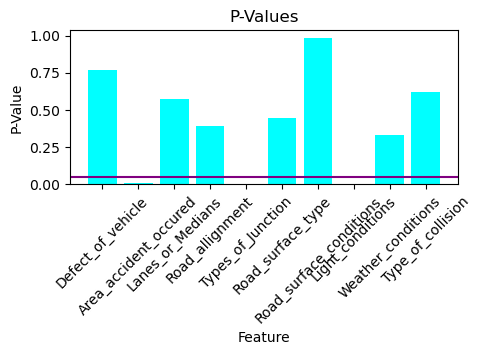

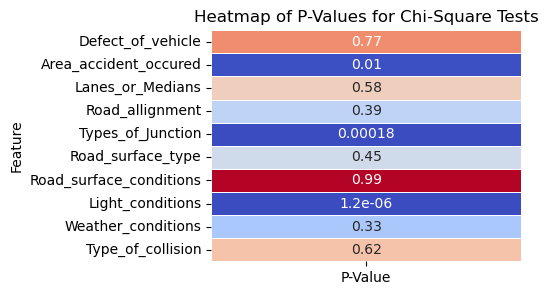

In [96]:
# Visualize P-Values
plt.figure(figsize=(5, 2))
plt.bar(categorical_features, p_values, color='cyan')
#Significance level:
plt.axhline(0.05, color='purple')
plt.title('P-Values')
plt.xlabel('Feature')
plt.ylabel('P-Value')
plt.xticks(rotation=45)
plt.show()

# Heatmap for P-Values
p_values_df = pd.DataFrame({'Feature': categorical_features, 'P-Value': p_values})
p_values_df.set_index('Feature', inplace=True)

plt.figure(figsize=(4, 3))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Heatmap of P-Values for Chi-Square Tests')
plt.show()

### Dataset 3

In [79]:
features = my_list[21:33]
df1 = df[features]

df1.head()

,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Data Understanding

In [80]:
# Set continuous and categorical features 
disc_feat = ['Number_of_vehicles_involved', 'Number_of_casualties']
cat_feat = ['Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']



#### Unique values for discrete features:

In [81]:
for feat in disc_feat:
    list = df1[feat].unique()
    print(f"{feat}: There are {len(list)} unique items in this list. \n {list}")

Number_of_vehicles_involved: There are 6 unique items in this list. 
 [2 1 3 6 4 7]
Number_of_casualties: There are 8 unique items in this list. 
 [2 1 3 4 6 5 8 7]


#### Unique values for categorical features: 

In [82]:
for feat in cat_feat:
    list = df1[feat].unique()
    print(f"{feat}: There are {len(list)} unique items in this list. \n {list}")

Vehicle_movement: There are 14 unique items in this list. 
 ['Going straight' 'U-Turn' 'Moving Backward' 'Turnover' 'Waiting to go'
 'Getting off' 'Reversing' 'Unknown' 'Parked' 'Stopping' 'Overtaking'
 'Other' 'Entering a junction' nan]
Casualty_class: There are 4 unique items in this list. 
 ['na' 'Driver or rider' 'Pedestrian' 'Passenger']
Sex_of_casualty: There are 3 unique items in this list. 
 ['na' 'Male' 'Female']
Age_band_of_casualty: There are 6 unique items in this list. 
 ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
Casualty_severity: There are 4 unique items in this list. 
 ['na' '3' '2' '1']
Work_of_casuality: There are 8 unique items in this list. 
 [nan 'Driver' 'Other' 'Unemployed' 'Employee' 'Self-employed' 'Student'
 'Unknown']
Fitness_of_casuality: There are 6 unique items in this list. 
 [nan 'Normal' 'Deaf' 'Other' 'Blind' 'NormalNormal']
Pedestrian_movement: There are 9 unique items in this list. 
 ['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossi

## Data Quality Report

### Discrete Features

In [83]:
data_quality_report_cont(df1, disc_feat)

Data Quality for Continous Features
Total Features: 2
                       Feature  Count  Missing  % missing  Cardinality
0  Number_of_vehicles_involved   8210        0        0.0            6
1         Number_of_casualties   8210        0        0.0            8


Descriptive Stats
                              count  mean   std  min  25%  50%  75%  max
Number_of_vehicles_involved  8210.0  2.01  0.64  1.0  2.0  2.0  2.0  7.0
Number_of_casualties         8210.0  1.51  0.97  1.0  1.0  1.0  2.0  8.0


There are no missing values in the discrete variables. 
Therefore, no imputation or data cleaning required.

### Categorical Features

In [84]:
data_quality_report_cat(df1, cat_feat)

Data Quality Report for Categorical Features
Stats
-----
                Feature  Count  Missing  % Missing  Cardinality
0      Vehicle_movement   8026      184       2.29           14
1        Casualty_class   8210        0       0.00            4
2       Sex_of_casualty   8210        0       0.00            3
3  Age_band_of_casualty   8210        0       0.00            6
4     Casualty_severity   8210        0       0.00            4
5     Work_of_casuality   6062     2148      35.43            8
6  Fitness_of_casuality   6440     1770      27.48            6
7   Pedestrian_movement   8210        0       0.00            9
8     Cause_of_accident   8210        0       0.00           20
9     Accident_severity   8210        0       0.00            3


Mode 1
------
                Feature            Mode 1  Mode 1 Freq.  Mode 1 %
0      Vehicle_movement    Going straight          5481     68.29
1        Casualty_class   Driver or rider          3201     38.99
2       Sex_of_casualty  

Three features have missing values. Since less than 60% of the values are 
missing, missing values will be imputed with the mode.  

In [85]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Number_of_vehicles_involved  8210 non-null   int64 
 1   Number_of_casualties         8210 non-null   int64 
 2   Vehicle_movement             8026 non-null   object
 3   Casualty_class               8210 non-null   object
 4   Sex_of_casualty              8210 non-null   object
 5   Age_band_of_casualty         8210 non-null   object
 6   Casualty_severity            8210 non-null   object
 7   Work_of_casuality            6062 non-null   object
 8   Fitness_of_casuality         6440 non-null   object
 9   Pedestrian_movement          8210 non-null   object
 10  Cause_of_accident            8210 non-null   object
 11  Accident_severity            8210 non-null   object
dtypes: int64(2), object(10)
memory usage: 5.2 MB


In [86]:
# Impute mode into missing values
col_impute = ['Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']

for col in col_impute:
    most_frequent = df1[col].mode()[0]
    df1[col] = df1[col].replace(np.nan, most_frequent)


C:\Users\manuel.clemente\AppData\Local\Temp\ipykernel_31808\408343183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].replace(np.nan, most_frequent)


In [87]:
# Check imputation
data_quality_report_cat(df1, col_impute)

Data Quality Report for Categorical Features
Stats
-----
                Feature  Count  Missing  % Missing  Cardinality
0      Vehicle_movement   8210        0        0.0           13
1     Work_of_casuality   8210        0        0.0            7
2  Fitness_of_casuality   8210        0        0.0            5


Mode 1
------
                Feature          Mode 1  Mode 1 Freq.  Mode 1 %
0      Vehicle_movement  Going straight          5665     69.00
1     Work_of_casuality          Driver          6071     73.95
2  Fitness_of_casuality          Normal          8161     99.40


Mode 2
------
                Feature           Mode 2  Mode 2 Freq.  Mode 2 %
0      Vehicle_movement  Moving Backward           642      7.82
1     Work_of_casuality    Self-employed          1343     16.36
2  Fitness_of_casuality     NormalNormal            13      0.16


Descriptive Stats
-----------------
                     count unique             top  freq
Vehicle_movement      8210     13  Going stra

In [88]:
dfj = df1.copy()
dfj.head()

,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


## Data Analysis of Discrete Features 

### Descriptive Statistics and Box Plots

Descriptive Statistics for Number_of_vehicles_involved:
                     count  mean  std  min  25%  50%  75%  max
Accident_severity                                            
Fatal injury         82.0   2.0  0.0  1.0  2.0  2.0  2.0  3.0
Serious Injury     1046.0   2.0  1.0  1.0  1.0  2.0  2.0  4.0
Slight Injury      7082.0   2.0  1.0  1.0  2.0  2.0  2.0  7.0


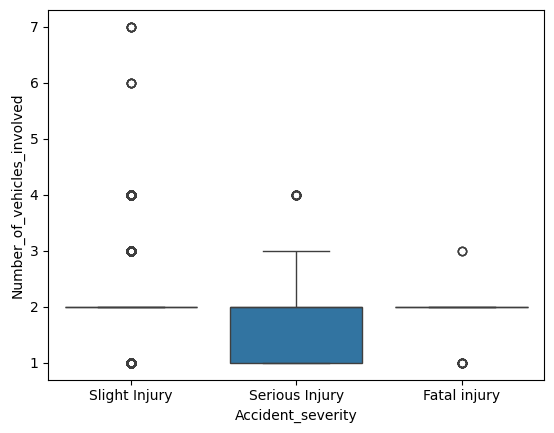

Descriptive Statistics for Number_of_casualties:
                     count  mean  std  min  25%  50%  75%  max
Accident_severity                                            
Fatal injury         82.0   2.0  1.0  1.0  1.0  2.0  4.0  5.0
Serious Injury     1046.0   2.0  1.0  1.0  1.0  1.0  2.0  6.0
Slight Injury      7082.0   1.0  1.0  1.0  1.0  1.0  2.0  8.0


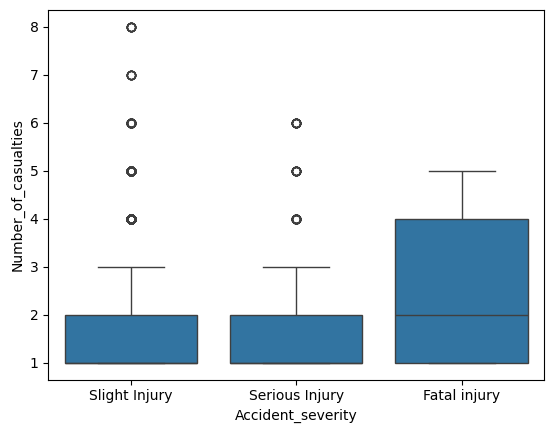

In [89]:
# Descriptive stats and box plots
for col in disc_feat:
    descriptive_stats = df1.groupby(target)[col].describe().round()
    print(f"Descriptive Statistics for {col}:\n {descriptive_stats}")
    sns.boxplot(x=target, y=col, data = df1)
    plt.show()

### Chi-Squre Test of Independence

In [90]:
# Create function for cramers_v
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

In [91]:
# Contingency tables
sig_disc = []
for col in disc_feat:
    ct = pd.crosstab(df1[col], df1[target])
    chi2, p, dof, expected = chi2_contingency(ct)
    # Calculate Cramer's V
    n = ct.sum().sum()
    min_dim = min(ct.shape) - 1
    cramer_v = cramers_v(chi2, n, min_dim)
    # Print if p-value is less than .5
    if p <= 0.5:
        sig_disc.append(col)
        print(f"Chi-Square Test for '{col}':")
        print(f"Chi2: {chi2:.02f}")
        print(f"P-values: {p:.02f}")
        print(f"Degrees of Freedom: {dof:.02f}")
        print(f"Cramér's V: {cramer_v}\n")
    
print(sig_disc)

Chi-Square Test for 'Number_of_vehicles_involved':
Chi2: 142.81
P-values: 0.00
Degrees of Freedom: 10.00
Cramér's V: 0.13189001744457038

Chi-Square Test for 'Number_of_casualties':
Chi2: 116.66
P-values: 0.00
Degrees of Freedom: 14.00
Cramér's V: 0.1192037549718662

['Number_of_vehicles_involved', 'Number_of_casualties']


### Conclusion of Analysis of Discrete Features
Based on the p-values, these features are statistically significant to the target variable:
- Number_of_vehicles_involved
- Number_of_casualties

### Data Analysis of Categorical Features

In [92]:
df_cat = df1[cat_feat]
df_cat.head()

,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [93]:
cat_feat

['Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

### Chi-Square Test of Independence

#### Contingency Tables

In [94]:
# Contingency tables
sig_cat = []
for col in cat_feat[:-1]:
    ct = pd.crosstab(df_cat[col], df_cat[target])
    chi2, p, dof, expected = chi2_contingency(ct)
    # Calculate Cramer's V
    n = ct.sum().sum()
    min_dim = min(ct.shape) - 1
    cramer_v = cramers_v(chi2, n, min_dim)
    # Print if p-value is less than .5
    if p <= 0.5:
        sig_cat.append(col)
        print(f"Chi-Square Test for '{col}':")
        print(f"Chi2: {chi2:.02f}")
        print(f"P-values: {p:.02f}")
        print(f"Degrees of Freedom: {dof:.02f}")
        print(f"Cramér's V: {cramer_v}\n")
    
print(sig_cat)

Chi-Square Test for 'Vehicle_movement':
Chi2: 28.24
P-values: 0.25
Degrees of Freedom: 24.00
Cramér's V: 0.05864406781565965

Chi-Square Test for 'Casualty_class':
Chi2: 7.62
P-values: 0.27
Degrees of Freedom: 6.00
Cramér's V: 0.030467697968743344

Chi-Square Test for 'Age_band_of_casualty':
Chi2: 13.97
P-values: 0.17
Degrees of Freedom: 10.00
Cramér's V: 0.04124580260715501

Chi-Square Test for 'Pedestrian_movement':
Chi2: 18.03
P-values: 0.32
Degrees of Freedom: 16.00
Cramér's V: 0.046861619874994875

Chi-Square Test for 'Cause_of_accident':
Chi2: 57.20
P-values: 0.02
Degrees of Freedom: 38.00
Cramér's V: 0.08346792519076886

['Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Pedestrian_movement', 'Cause_of_accident']


### Analysis of Contingency Table and Chi-Square Test of Independence
All categorical features were analyzed to determine if there was a significant
association between each feature and the target variable. Features that
had $\text{p-value} \le 0.5$, are shown in the output. 

Considering a confidence level of 95%, only one feature met this requirement:
* Cause_of_accident

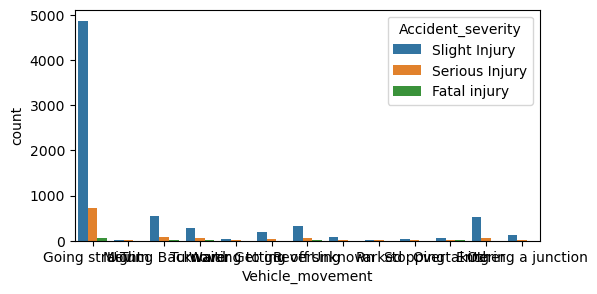

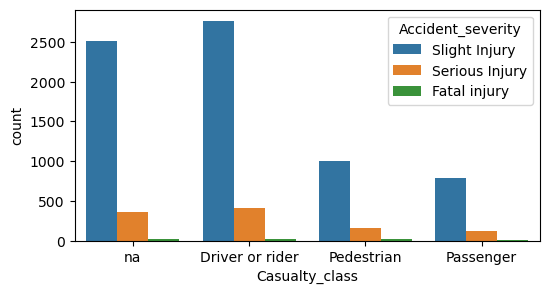

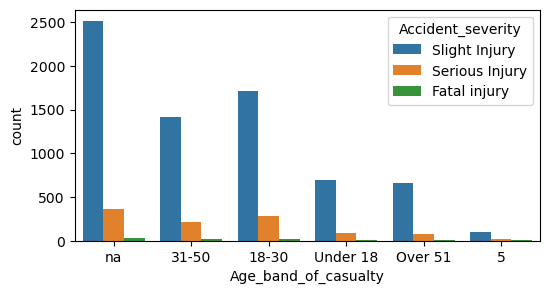

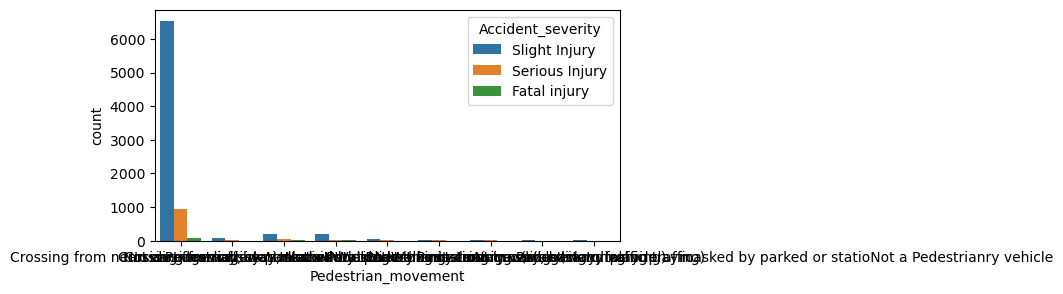

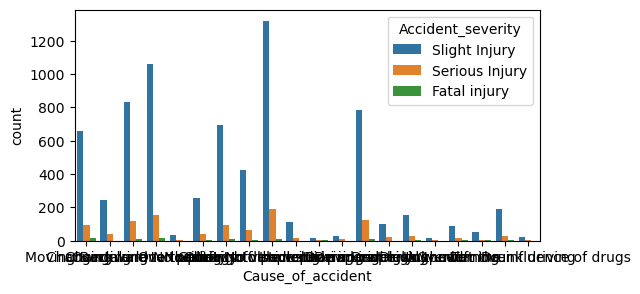

In [100]:
for col in sig_cat: 
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue=target, data=df_cat)
    plt.show()